# ✅ Paso 1: Entendiendo el problema

In [16]:
# Queremos predecir el rendimiento escolar (nota final G3) de estudiantes
# a partir de datos sociodemográficos, académicos y de estilo de vida.

# ✅ Paso 2: Carga del dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Cargamos la muestra generada anteriormente
data = pd.read_csv("../data_sample/student-merged-sample.csv")
print("Shape:", data.shape)
data.head()

Shape: (100, 53)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,M,18,U,GT3,T,4,4,teacher,services,...,4,3,3,2,2,2,0,12,12,13
1,GP,M,17,U,GT3,T,2,3,other,other,...,5,2,2,1,1,2,2,9,12,13
2,GP,M,18,U,LE3,T,3,3,services,health,...,3,2,4,2,4,4,10,10,10,10
3,GP,F,18,U,LE3,T,2,2,other,other,...,4,3,3,1,1,2,0,10,9,12
4,GP,F,15,U,GT3,A,4,3,services,services,...,4,3,2,1,1,1,0,15,14,15


# ✅ Paso 3: EDA rápido

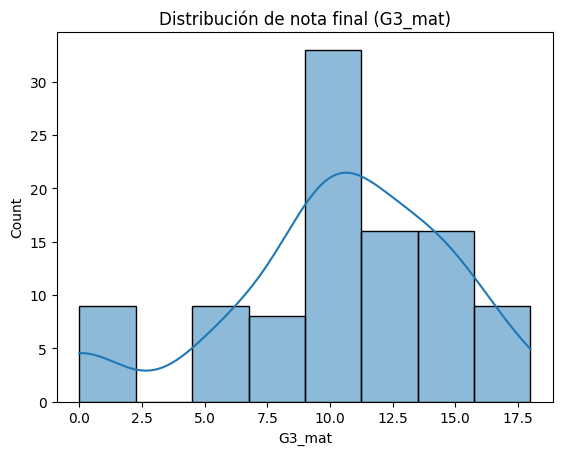

In [19]:
sns.histplot(data['G3_mat'], kde=True)
plt.title("Distribución de nota final (G3_mat)")
plt.show()

# ✅ Paso 4: Preprocesamiento

In [20]:
df = data.copy()

In [21]:
# Elegimos 'G3_mat' como variable objetivo
y = df['G3_mat']

In [22]:
# Eliminamos otras columnas que no usaremos o duplicadas
X = df.drop(columns=['G3_mat', 'G3_por'])

In [23]:
# Codificamos variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [24]:
# División en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Paso 5: Entrenamiento de modelos

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
# Entrenamos varios modelos
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

LinearRegression - MAE: 3.13, RMSE: 4.51
RandomForest - MAE: 1.69, RMSE: 2.80


# ✅ Paso 6: Seleccionamos el mejor (RandomForest) y evaluamos

In [27]:
best_model = models['RandomForest']
y_pred = best_model.predict(X_test)

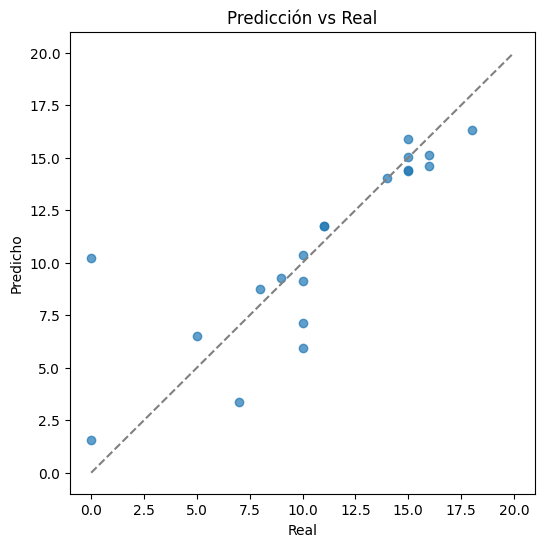

In [28]:
# Gráfico de comparación
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.title("Predicción vs Real")
plt.plot([0,20], [0,20], '--', color='gray')
plt.show()

# ✅ Paso 7: Guardamos el modelo

In [29]:
import joblib
joblib.dump(best_model, '../models/final_model.pkl')
print("✅ Modelo guardado como final_model.pkl")

✅ Modelo guardado como final_model.pkl
